In [145]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

#Library for saving data
import pickle

#other libraries
import pandas as pd
import numpy as np

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [146]:
df=pd.read_csv('Telecom_customer_churn.csv')

#show all columns in dataframe
pd.set_option('display.max_columns', None)

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Description

Observations:

1.The dataset has 21 columns 

2.There are both categorical and numerical data

3.Customer churn is when a company’s customers stop doing business with that company.It is categorical data. It consists of Yes and No. Hence here we would be using binary classifications.
Yes means they have stopped and No means they havnt

4.The data consists of features which has yes/no categorical and also more than two categories

Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base

# Statistical data analysis

In [147]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,4626-GYCZP,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Observations:

1.There is no column with single unique values

2.Null values is not present as all of them have 7043 datas

3.Outliers are seen in 	SeniorCitizen,tenure and MonthlyCharges

labels count: 
  No     5174
Yes    1869
Name: Churn, dtype: int64


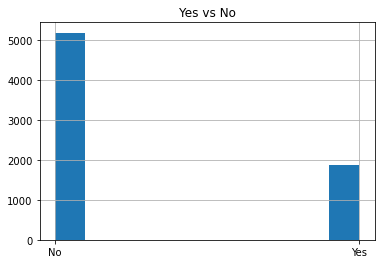

In [148]:
# checking for class imbalance
print("labels count: \n ",df["Churn"].value_counts())

df["Churn"].hist(grid=True)
plt.title("Yes vs No")
plt.show()


class imbalance is present and we would need to balance the class

# Graphical data analysis

In [149]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the Churn  column
df["Churn"]=lab_enc.fit_transform(df['Churn'])


In [150]:
df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [151]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["Churn"].sort_values(ascending=False)

Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn, dtype: float64

0 is No

1 is Yes

Male      3555
Female    3488
Name: gender, dtype: int64


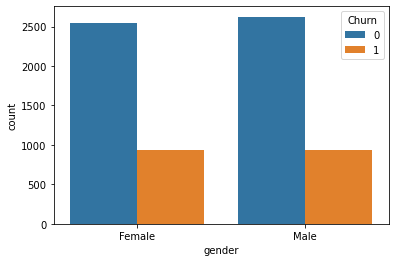

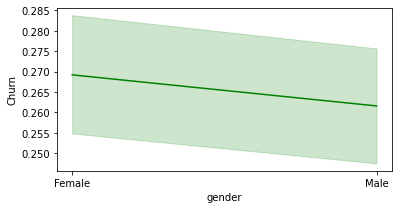

Text(0.5, 1.0, 'gender')

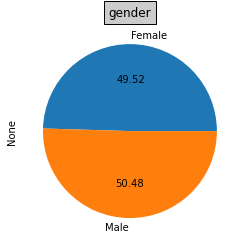

In [152]:
print(df['gender'].value_counts())

sns.countplot(x='gender', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="gender",y="Churn",data=df, color='green')
plt.show()


df.groupby('gender').size().plot(kind='pie', autopct='%.2f')
plt.title("gender",bbox={'facecolor':'0.8', 'pad':5})

There is almost equal number of male and female but,More number of females have churned, hence more attention might need to be given into Female to retain them

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


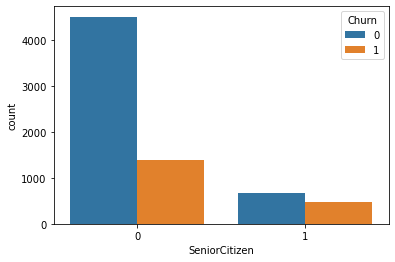

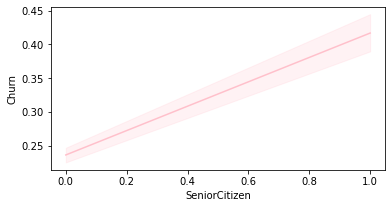

Text(0.5, 1.0, 'SeniorCitizen')

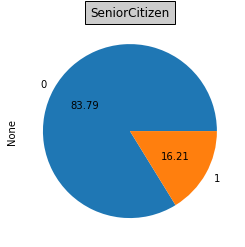

In [153]:
print(df['SeniorCitizen'].value_counts())

sns.countplot(x='SeniorCitizen', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="SeniorCitizen",y="Churn",data=df, color='pink')
plt.show()

df.groupby('SeniorCitizen').size().plot(kind='pie', autopct='%.2f')
plt.title("SeniorCitizen",bbox={'facecolor':'0.8', 'pad':5})

There is Less Senior Citizens among the group and within the senior citizens churning is less, hence we would need to focus on the younger group to reduce the number of churn through various technolgies and innovations they can more relate to

No     3641
Yes    3402
Name: Partner, dtype: int64


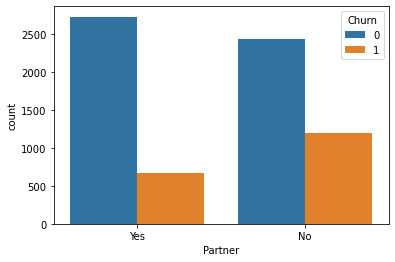

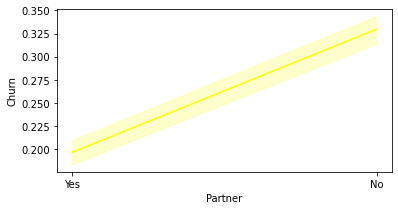

Text(0.5, 1.0, 'Partner')

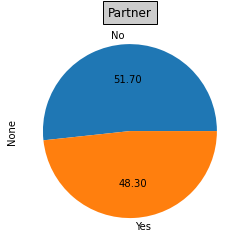

In [154]:
print(df['Partner'].value_counts())

sns.countplot(x='Partner', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="Partner",y="Churn",data=df, color='yellow')
plt.show()

df.groupby('Partner').size().plot(kind='pie', autopct='%.2f')
plt.title("Partner",bbox={'facecolor':'0.8', 'pad':5})

Half of them are partners and the other half are not partners

Churning is occuring more among the customers who arent partners. Hence more amount of marketing would need to brough among non partner to make them a partner or build their trust and affinity to the product

No     4933
Yes    2110
Name: Dependents, dtype: int64


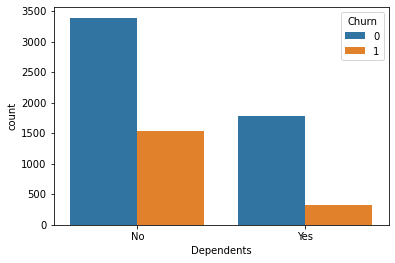

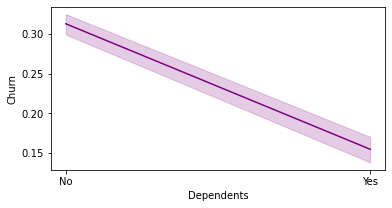

Text(0.5, 1.0, 'Dependents')

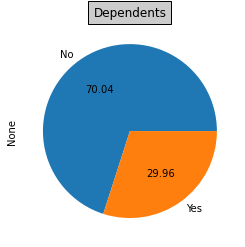

In [155]:
print(df['Dependents'].value_counts())

sns.countplot(x='Dependents', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="Dependents",y="Churn",data=df, color='purple')
plt.show()

df.groupby('Dependents').size().plot(kind='pie', autopct='%.2f')
plt.title("Dependents",bbox={'facecolor':'0.8', 'pad':5})

There are more people with no dependents

If the customer has a dependent, there can be seen a higher chance to churn

Yes    6361
No      682
Name: PhoneService, dtype: int64


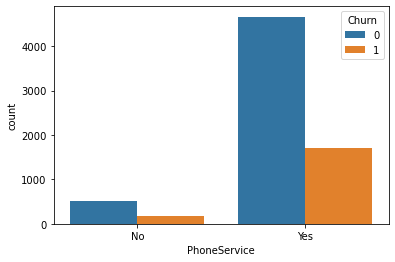

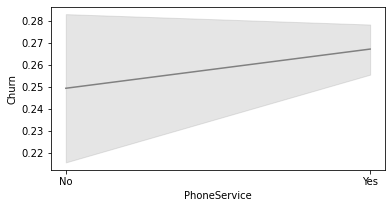

Text(0.5, 1.0, 'PhoneService')

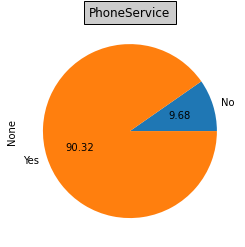

In [156]:
print(df['PhoneService'].value_counts())

sns.countplot(x='PhoneService', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="PhoneService",y="Churn",data=df, color='grey')
plt.show()

df.groupby('PhoneService').size().plot(kind='pie', autopct='%.2f')
plt.title("PhoneService",bbox={'facecolor':'0.8', 'pad':5})

90% of them have phone services

People who dont have phone service is more likely to churn

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


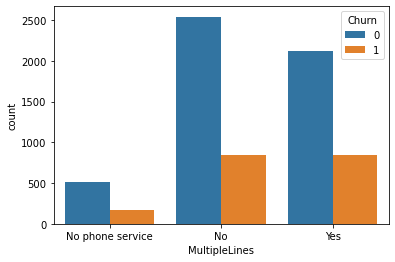

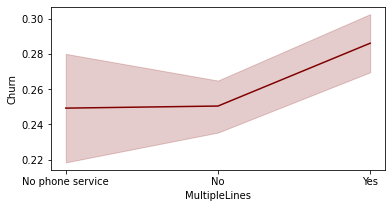

Text(0.5, 1.0, 'MultipleLines')

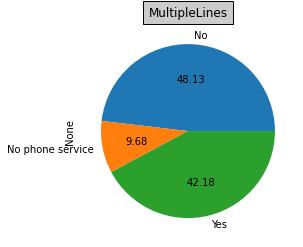

In [157]:
print(df['MultipleLines'].value_counts())

sns.countplot(x='MultipleLines', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="MultipleLines",y="Churn",data=df, color='maroon')
plt.show()

df.groupby('MultipleLines').size().plot(kind='pie', autopct='%.2f')
plt.title("MultipleLines",bbox={'facecolor':'0.8', 'pad':5})

Multiple lines are present among 42%, Only single lines are present among 47% and No phone service is among 9.7%

Highest people are churning if they have multiple line. There is almost equal churning in single line and No phone service

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


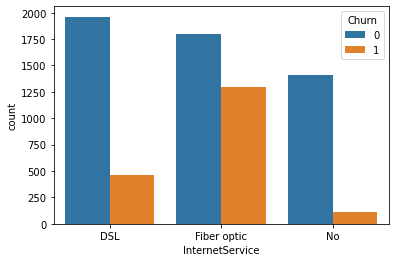

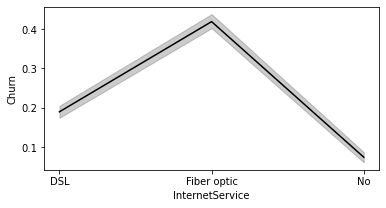

Text(0.5, 1.0, 'InternetService')

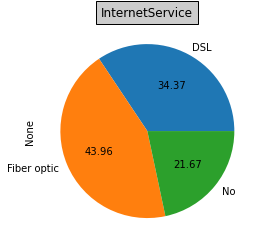

In [158]:
print(df['InternetService'].value_counts())

sns.countplot(x='InternetService', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="InternetService",y="Churn",data=df, color='black')
plt.show()

df.groupby('InternetService').size().plot(kind='pie', autopct='%.2f')
plt.title("InternetService",bbox={'facecolor':'0.8', 'pad':5})

Fibre optics is used by maximum respondents

Highest churning is seen for People using Fibre Optic

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


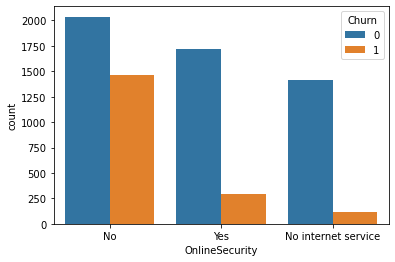

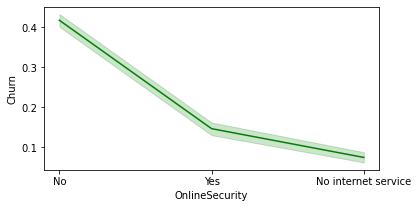

Text(0.5, 1.0, 'OnlineSecurity')

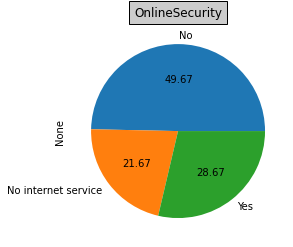

In [159]:
print(df['OnlineSecurity'].value_counts())

sns.countplot(x='OnlineSecurity', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="OnlineSecurity",y="Churn",data=df, color='green')
plt.show()

df.groupby('OnlineSecurity').size().plot(kind='pie', autopct='%.2f')
plt.title("OnlineSecurity",bbox={'facecolor':'0.8', 'pad':5})

There is not online security among 59

Churning is highest where there is no online security. Having a online security is more important than having internet service

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


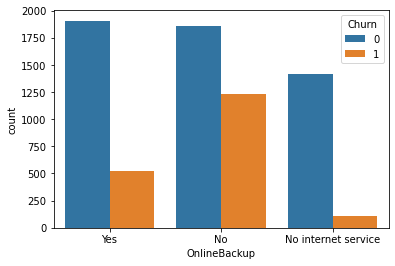

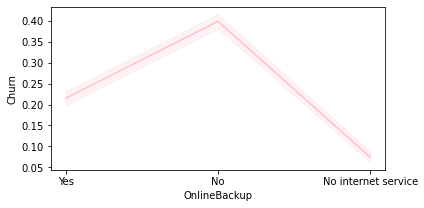

Text(0.5, 1.0, 'OnlineBackup')

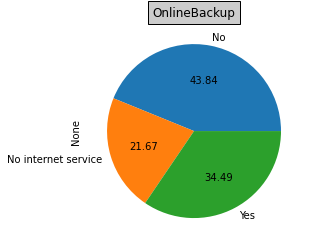

In [160]:
print(df['OnlineBackup'].value_counts())

sns.countplot(x='OnlineBackup', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="OnlineBackup",y="Churn",data=df,color='pink')
plt.show()

df.groupby('OnlineBackup').size().plot(kind='pie', autopct='%.2f')
plt.title("OnlineBackup",bbox={'facecolor':'0.8', 'pad':5})

Online backup is not present among 43% respondents

Highest churning can be seen when there is no online backup. 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


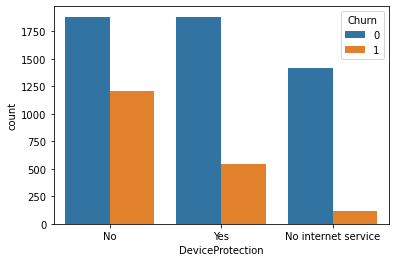

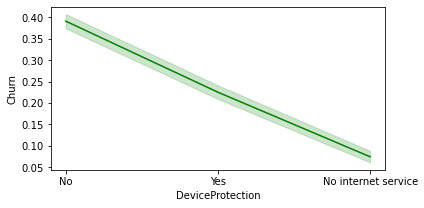

Text(0.5, 1.0, 'DeviceProtection')

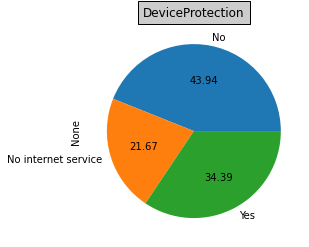

In [161]:
print(df['DeviceProtection'].value_counts())

sns.countplot(x='DeviceProtection', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="DeviceProtection",y="Churn",data=df, color='green')
plt.show()

df.groupby('DeviceProtection').size().plot(kind='pie', autopct='%.2f')
plt.title("DeviceProtection",bbox={'facecolor':'0.8', 'pad':5})

Device protection is not present in 43% employees

There is highest churning when there is no Device Protection. Hence Having a Device Protection is more important than having internet service

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


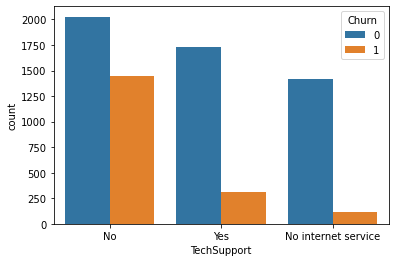

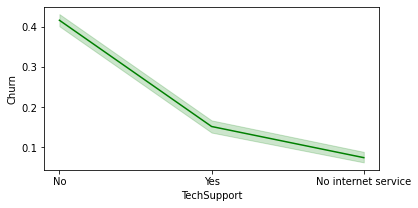

Text(0.5, 1.0, 'TechSupport')

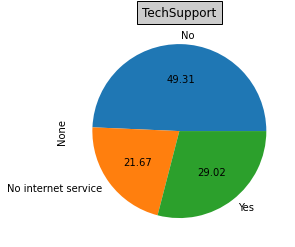

In [162]:
print(df['TechSupport'].value_counts())

sns.countplot(x='TechSupport', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="TechSupport",y="Churn",data=df, color='green')
plt.show()

df.groupby('TechSupport').size().plot(kind='pie', autopct='%.2f')
plt.title("TechSupport",bbox={'facecolor':'0.8', 'pad':5})

Tech support is not present among 49% employees

There is highest churning when there is no tech support. Hence Having a tech support is more important than having internet service

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


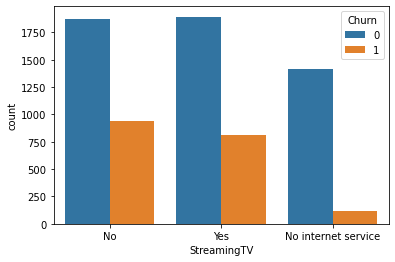

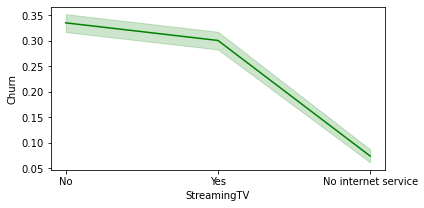

Text(0.5, 1.0, 'StreamingTV')

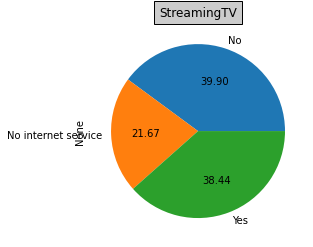

In [163]:
print(df['StreamingTV'].value_counts())

sns.countplot(x='StreamingTV', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="StreamingTV",y="Churn",data=df, color='green')
plt.show()

df.groupby('StreamingTV').size().plot(kind='pie', autopct='%.2f')
plt.title("StreamingTV",bbox={'facecolor':'0.8', 'pad':5})

Streaming TV is not present among 40% emplyees

Having or not having streaming TV does not contribute much towards churning. Both who had and didnt have Streaming TV have almost equally churned

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


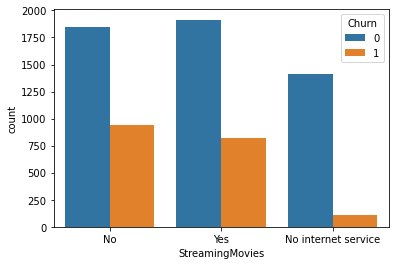

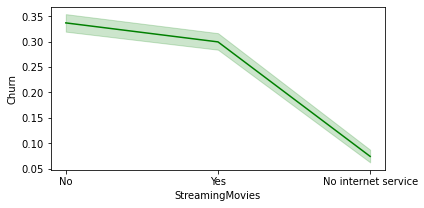

Text(0.5, 1.0, 'StreamingMovies')

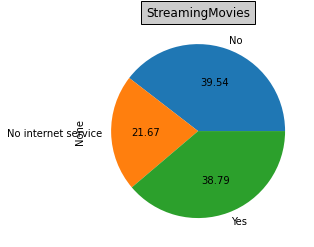

In [164]:
print(df['StreamingMovies'].value_counts())

sns.countplot(x='StreamingMovies', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="StreamingMovies",y="Churn",data=df, color='green')
plt.show()

df.groupby('StreamingMovies').size().plot(kind='pie', autopct='%.2f')
plt.title("StreamingMovies",bbox={'facecolor':'0.8', 'pad':5})

Online backup is not present among 43% employees

Having or not having streaming movies does not contribute much towards churning. Both who had and didnt have Streaming movies have almost equally churned

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


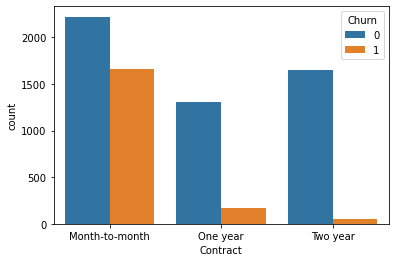

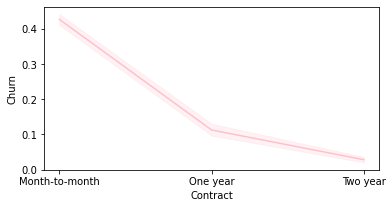

Text(0.5, 1.0, 'Contract')

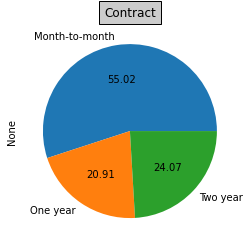

In [165]:
print(df['Contract'].value_counts())

sns.countplot(x='Contract', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="Contract",y="Churn",data=df, color='pink')
plt.show()

df.groupby('Contract').size().plot(kind='pie', autopct='%.2f')
plt.title("Contract",bbox={'facecolor':'0.8', 'pad':5})

54.88% have month to month respondents

Churning is highest among month to month contracts

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


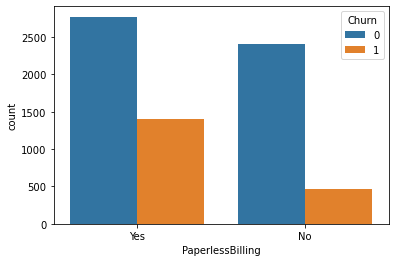

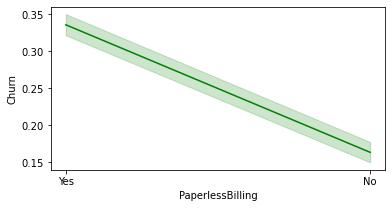

Text(0.5, 1.0, 'PaperlessBilling')

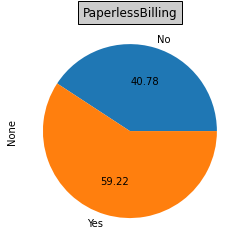

In [166]:
print(df['PaperlessBilling'].value_counts())

sns.countplot(x='PaperlessBilling', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="PaperlessBilling",y="Churn",data=df, color='green')
plt.show()

df.groupby('PaperlessBilling').size().plot(kind='pie', autopct='%.2f')
plt.title("PaperlessBilling",bbox={'facecolor':'0.8', 'pad':5})

Paperless billig is among 60% employees and churning is highest among them

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


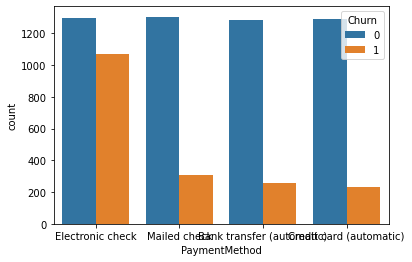

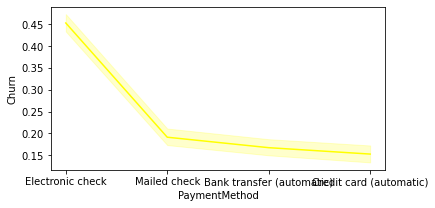

Text(0.5, 1.0, 'PaymentMethod')

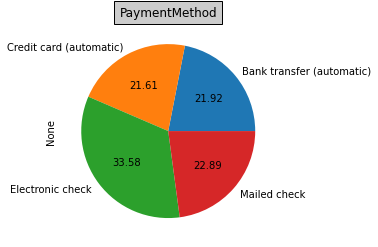

In [167]:
print(df['PaymentMethod'].value_counts())

sns.countplot(x='PaymentMethod', hue='Churn',data = df)

plt.figure(figsize=(6,3))
sns.lineplot(x="PaymentMethod",y="Churn",data=df, color='yellow')
plt.show()

df.groupby('PaymentMethod').size().plot(kind='pie', autopct='%.2f')
plt.title("PaymentMethod",bbox={'facecolor':'0.8', 'pad':5})

Electronic checque is used by 34% employees and churning is highest among them

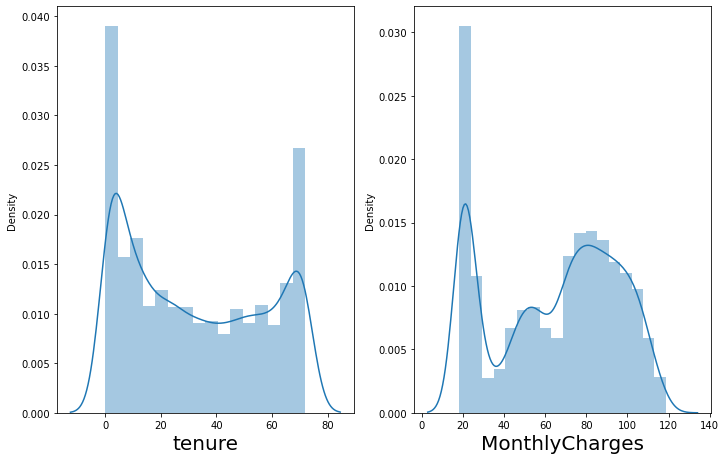

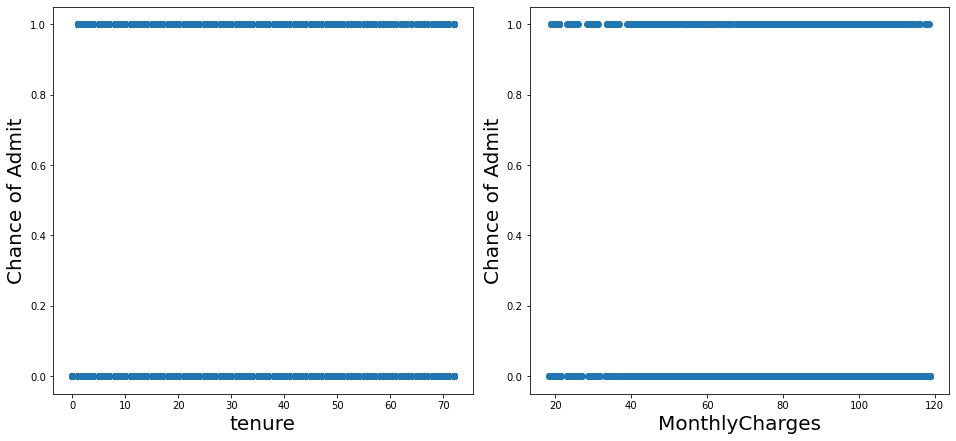

In [168]:
x = df[[ 'tenure', 'MonthlyCharges']].copy()
y=df['Churn']
#understanding relationship between features and label
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(x[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()


#visualising the relationship
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Tenure is between 0 to 70 and monthly charges is between 20 to 118

# Feature Engineering

In [169]:
#customerID doesnt play any role, hence dropping it
df=df.drop(columns=["customerID"])

In [170]:
# total charges has 6531 unique values, hence dropping them 
df=df.drop(columns=["TotalCharges"])

# EDA

# 1.Dealing with continous data

In [171]:
#removing duplicate values
df.drop_duplicates(inplace=True)

Checking skewness and removing outliers

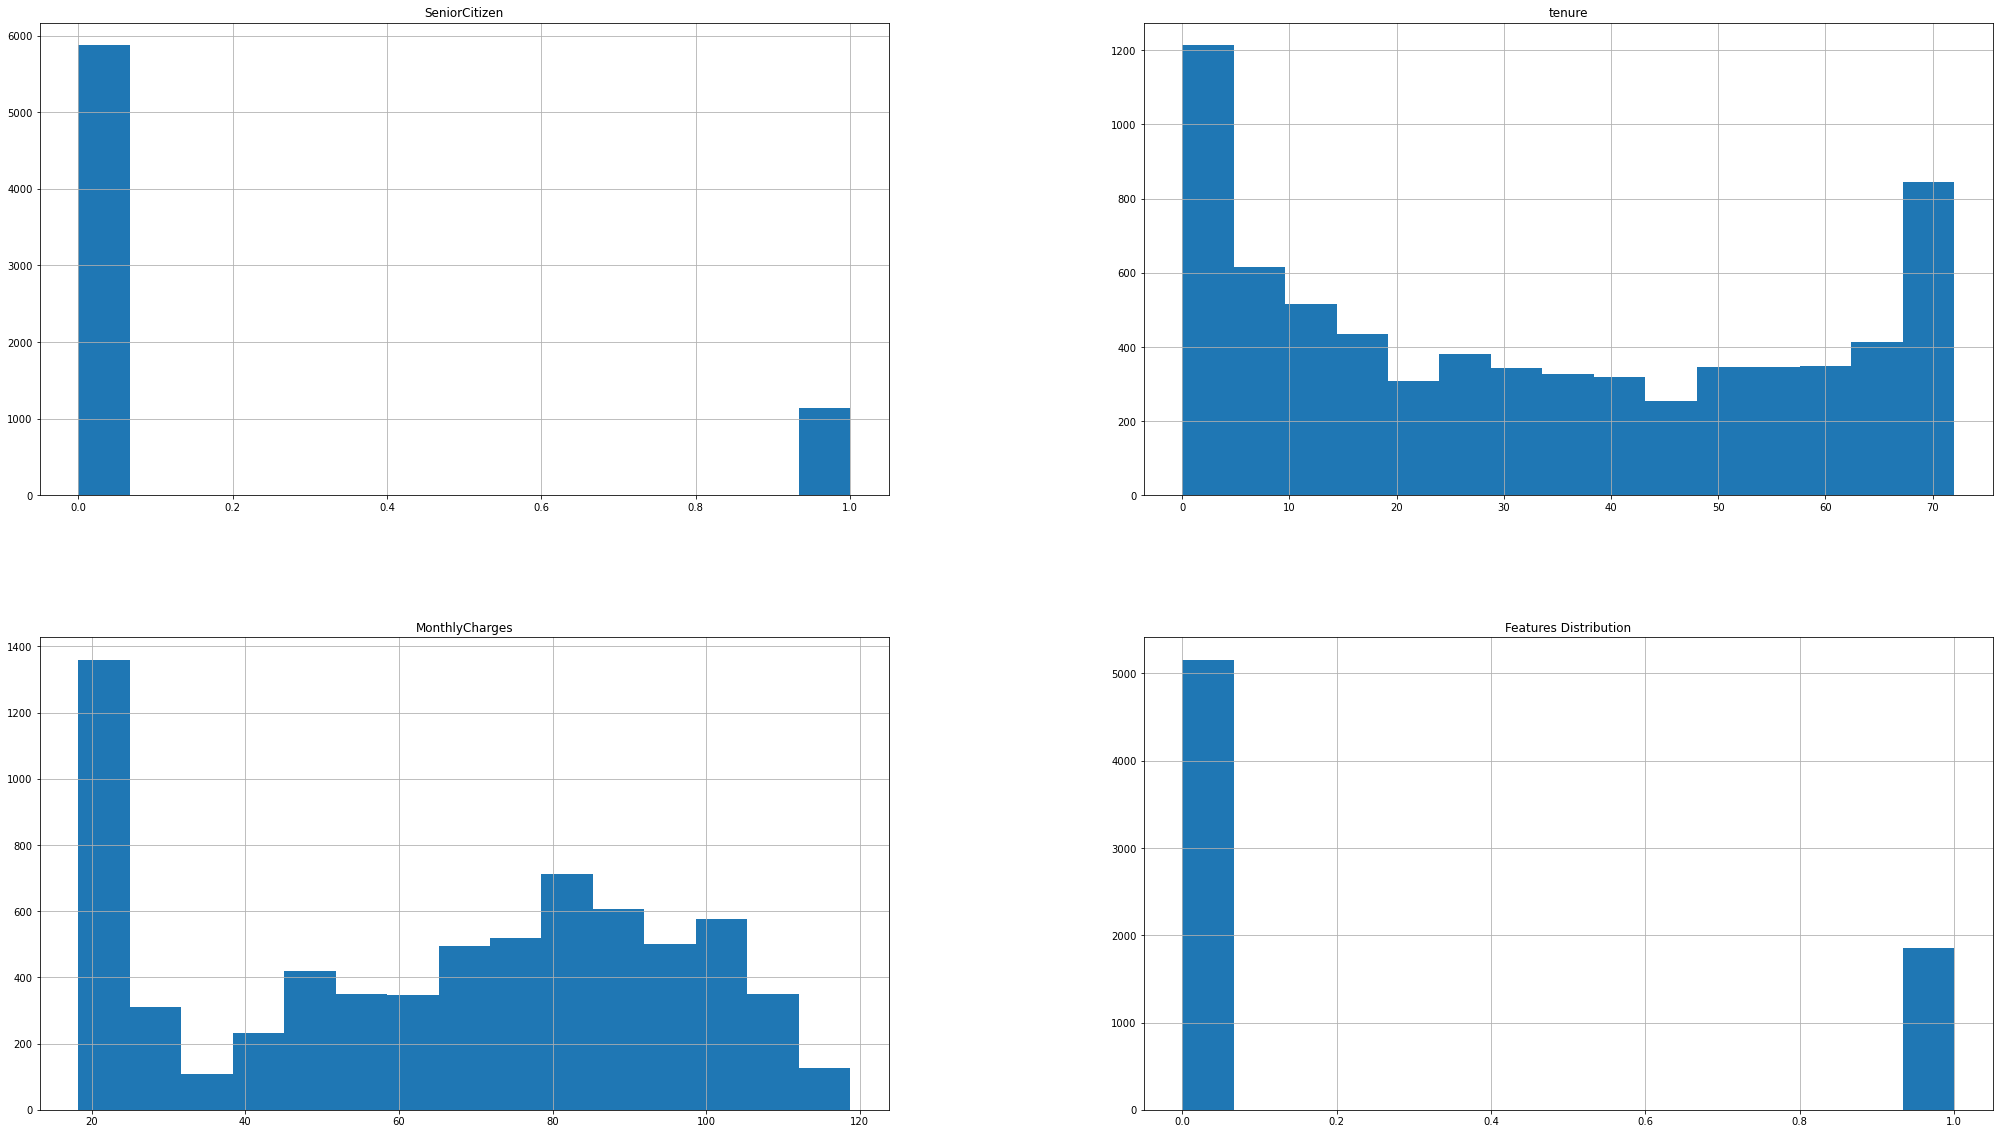

In [172]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()


In [173]:
#finding continous columns
df.select_dtypes(include=["number"]).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn'], dtype='object')

In [174]:
# reducing skewness
x = df[['tenure', 'MonthlyCharges']].copy()
x.skew()


tenure            0.235849
MonthlyCharges   -0.225186
dtype: float64

In [175]:
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(x))
threshold=1
df_new=df[(z<1).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  7016
columns after applying zscore:  2171


In [176]:
df=df_new

In [177]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

x_new=pd.DataFrame(df_new,columns=x.columns)

df_new=df
x_new.skew()

tenure           -0.243570
MonthlyCharges   -0.260068
dtype: float64

In [178]:
#checking nan
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

# 2. Dealing with categorical data

In [179]:
# a.finding the categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

# b.Undersampling and oversampling

In [180]:
#balancing class

# class count
class_count_0, class_count_1 = df['Churn'].value_counts()

#Separate class
class_0 = df[df['Churn'] == 0]
class_1 = df[df['Churn'] == 1]

print('class No/0:', class_0.shape)
print('class Yes/1:', class_1.shape)

class No/0: (1600, 19)
class Yes/1: (571, 19)


total class of 1 and 0: 
 1    571
0    571
Name: Churn, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

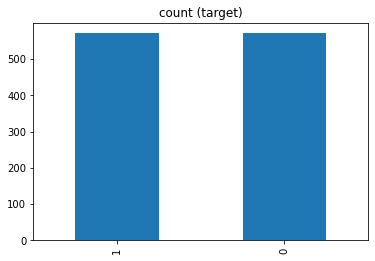

In [181]:
#performing oversampling
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0: \n",test_under['Churn'].value_counts())# plot the count after under-sampeling

test_under['Churn'].value_counts().plot(kind='bar', title='count (target)')

If we are oversampling, the accuracy score is decreasing

In [182]:
from sklearn.utils import resample

No = df[df.Churn==0]
Yes = df[df.Churn==1]

# downsample majority
no_downsampled = resample(No,
                        replace = False, # sample without replacement
                         n_samples = len(Yes), # match minority n
                        random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_downsampled,Yes])

# checking counts
downsampled.Churn.value_counts()

1    571
0    571
Name: Churn, dtype: int64

If we are undersampling also accuracy score is decreasing, so not using the data to proceed

# c.Encoding

In [183]:
x=df.drop(columns=["Churn"])
y=df['Churn']

In [184]:
#one hot encoding on data
x=pd.get_dummies(x)
x

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,0,34,56.95,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
3,0,45,42.30,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
6,0,22,89.10,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0
10,0,13,49.95,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
18,0,10,55.20,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7031,1,55,60.00,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0
7033,0,38,69.50,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
7035,0,19,78.70,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0
7036,0,12,60.65,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0


In [185]:
len(y)

2171

# Feature Selection

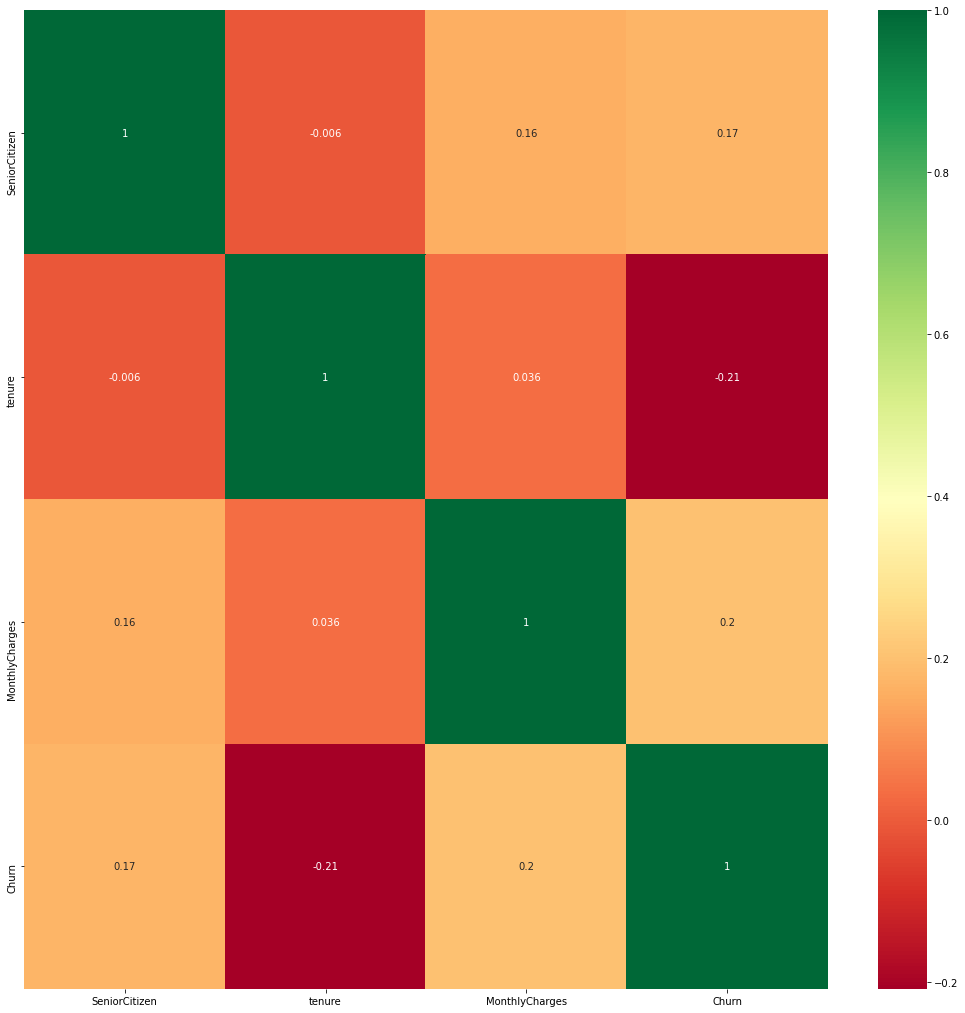

In [186]:
#heatmap
plt.figure(figsize = (18,18))
sns.heatmap(df_new.corr(), annot = True, cmap = "RdYlGn")
plt.show()

Multicollinearity is not seen

# PCA

Not performing PCA as only 38 columns are present after encoding

# Splitting data

In [187]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

#splitting data
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [188]:
y_train.head()

5310    0
929     0
647     0
4963    0
796     0
Name: Churn, dtype: int32

# Finding best random state

In [189]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.8084714548802947 on Random State 103


In [190]:
x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=103)

# Modelling

In [191]:
#modelling

from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8084714548802947
[[388  27]
 [ 77  51]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       415
           1       0.65      0.40      0.50       128

    accuracy                           0.81       543
   macro avg       0.74      0.67      0.69       543
weighted avg       0.79      0.81      0.79       543



In [192]:
#modelling
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6593001841620626
[[300 115]
 [ 70  58]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       415
           1       0.34      0.45      0.39       128

    accuracy                           0.66       543
   macro avg       0.57      0.59      0.57       543
weighted avg       0.70      0.66      0.68       543



In [193]:
#modelling
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7790055248618785
[[372  43]
 [ 77  51]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       415
           1       0.54      0.40      0.46       128

    accuracy                           0.78       543
   macro avg       0.69      0.65      0.66       543
weighted avg       0.76      0.78      0.77       543



In [194]:
#modelling
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)

print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7992633517495396
[[385  30]
 [ 79  49]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       415
           1       0.62      0.38      0.47       128

    accuracy                           0.80       543
   macro avg       0.72      0.66      0.67       543
weighted avg       0.78      0.80      0.78       543



In [195]:
#Finding overfitting
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of Logistic Regression model : 0.7572434980666348
Cross validation score of Decision Tree model : 0.6729466603103977
Cross validation score of Random Forest model : 0.7360580539223476
Cross validation score of SVC model : 0.7369881879336828


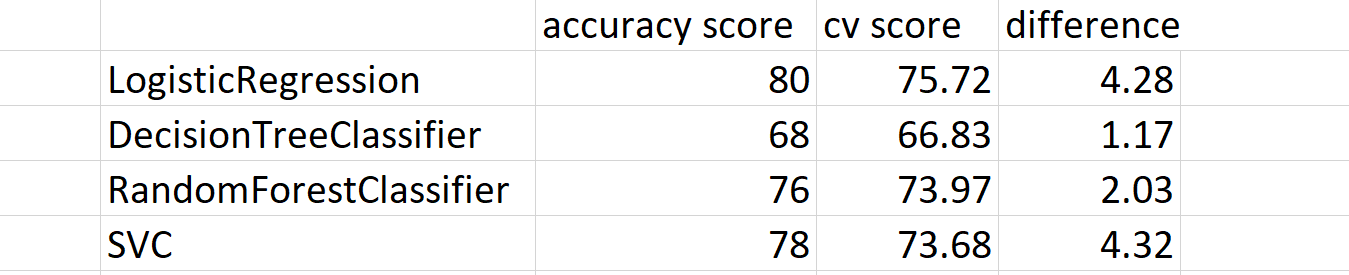

But since there is a class imbalance problem, which even when fixed didnt give a good score using ROC AUC score would be better

# ROC AUC curve

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [197]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

In [198]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [199]:
print("Logistic regression score is: ",lr.score(x_test,y_test))
print("Decision tree score is ",dt.score(x_test,y_test))
print("Random forest score is",rf.score(x_test,y_test))
print("K-neighbour score is",kn.score(x_test,y_test))

Logistic regression score is:  0.8084714548802947
Decision tree score is  0.6777163904235728
Random forest score is 0.7661141804788214
K-neighbour score is 0.7182320441988951


In [200]:
#LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.6666886295180723

In [201]:
#DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.583847891566265

In [202]:
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.622769201807229

In [203]:
#KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.5995481927710844

Logistic Regression has ROC AUC highest score, hence choosing it

# Reason for going for ROC_AUC is because: 

1.accuracy score is calculated on the predicted classes while we calculate ROC AUC on predicted scores.

2.accuracy looks at fractions of correctly assigned positive and negative classes and since our class is highly imbalanced we get a really high accuracy score by simply predicting that all observations belong to the majority class

When the data was tried to be balanced using smote, the accuracy fell. Hence smote/downsampling should not be done on data

# Hyperparameter tuning and GCV

In [204]:
#Logistic Regression
paramters={'penalty':['l1', 'l2','elasticnet','none'],
           'dual':[True,False],
           'tol':[0.75,1],
           'C':[2,3,4,7],
           'intercept_scaling':[1.2,2.1],
           'class_weight':['dict','balanced'],
           'random_state':[2,3],
          'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           }

In [205]:
from sklearn.linear_model import LogisticRegression


GCV=GridSearchCV(LogisticRegression(),paramters,cv=5)

In [206]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [2, 3, 4, 7],
                         'class_weight': ['dict', 'balanced'],
                         'dual': [True, False], 'intercept_scaling': [1.2, 2.1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [2, 3],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.75, 1]})

In [207]:
GCV.best_params_

{'C': 3,
 'class_weight': 'dict',
 'dual': False,
 'intercept_scaling': 1.2,
 'penalty': 'l2',
 'random_state': 2,
 'solver': 'lbfgs',
 'tol': 1}

In [218]:
mod=LogisticRegression(random_state=2,C=3,dual=False,intercept_scaling=1.2,penalty='l2',tol=1,class_weight='dict',solver='lbfgs')

In [219]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

80.84714548802947


Accuracy obtained is 80.84 %

In [220]:
regression=LogisticRegression()
regression.fit(x_train,y_train)

LogisticRegression()

# Saving of model

In [221]:
#saving LogisticRegression model
LogisticRegression_tree_model=LogisticRegression()
LogisticRegression_tree_model.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(LogisticRegression_tree_model,open(filename,'wb'))

In [222]:
y_pred=regression.predict(x_test)

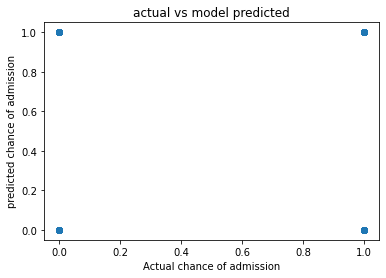

In [223]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

In [224]:
scr=cross_val_score(regression,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : 0.7572434980666348


In [225]:
regression.fit(x_train,y_train)
pred=regression.predict(x_test)
print("accuracy score of the Logistic Regression model is",accuracy_score(y_test,pred)*100)

accuracy score of the Logistic Regression model is 80.84714548802947


In [226]:
regression.fit(x_train,y_train)
print("ROC AUC Score of the logistic regression model is",roc_auc_score(y_test,regression.predict(x_test)))

ROC AUC Score of the logistic regression model is 0.6666886295180723


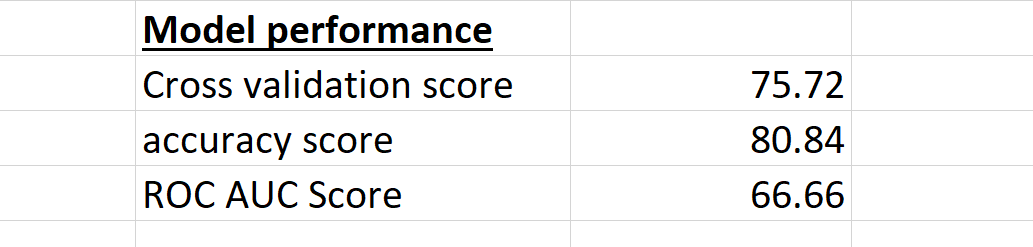